In [1]:
pwd

'/Users/alecanales/Projects/Python Workshop/python_viz_plotnine'

In [3]:
ls

Data/           Untitled.ipynb  gapminder.txt*


In [5]:
import pandas as pd
from plotnine import *

In [7]:
gapminder = pd.read_table("gapminder.txt")

In [9]:
gapminder.head(5)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


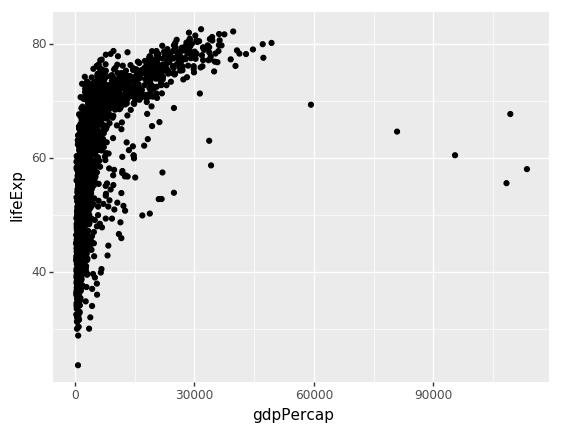

<ggplot: (281145457)>

In [10]:
ggplot(gapminder, aes(x='gdpPercap', y='lifeExp')) + geom_point()

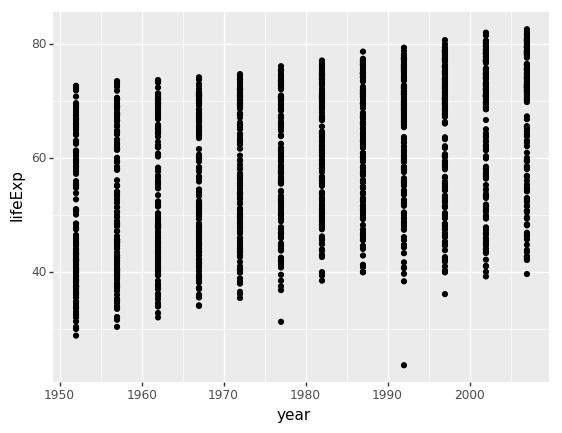

<ggplot: (7551596948)>

In [19]:
ggplot(gapminder, aes(x='year', y='lifeExp')) + geom_point()

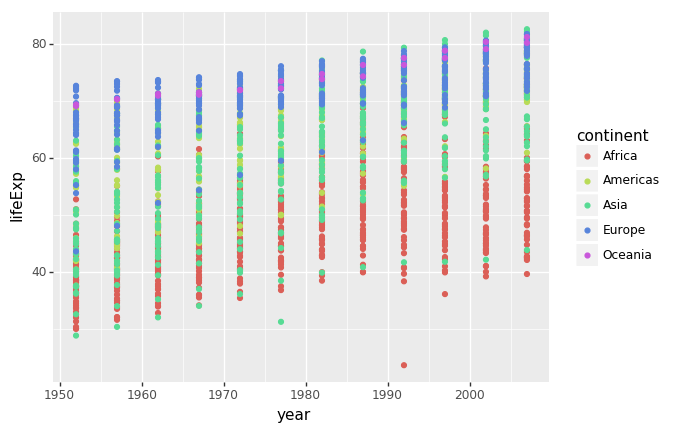

<ggplot: (-9223372029302496063)>

In [21]:
ggplot(gapminder, aes(x='year', y='lifeExp', color='continent')) + geom_point() 

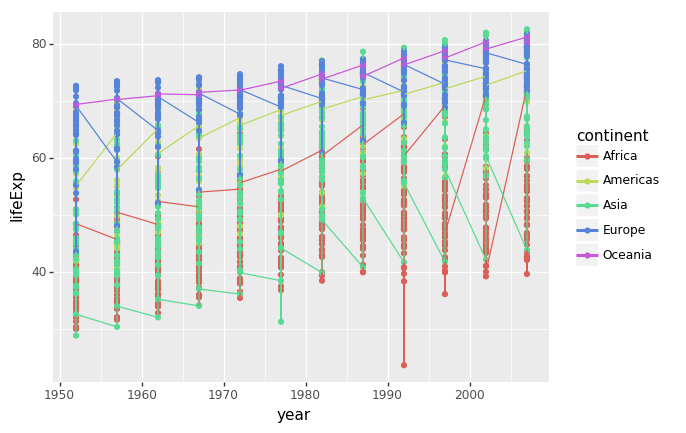

<ggplot: (7551575998)>

In [22]:
ggplot(gapminder, aes(x='year', y='lifeExp', color='continent')) + geom_point() + geom_line()

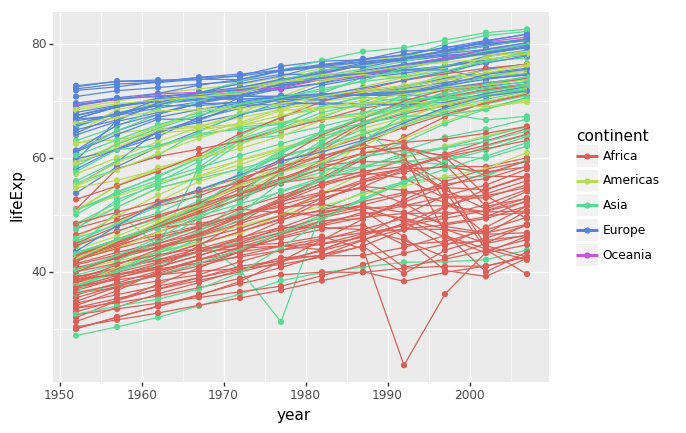

<ggplot: (7552115471)>

In [23]:
ggplot(gapminder, aes(x='year', y='lifeExp', color='continent', group='country')) + geom_point() + geom_line()

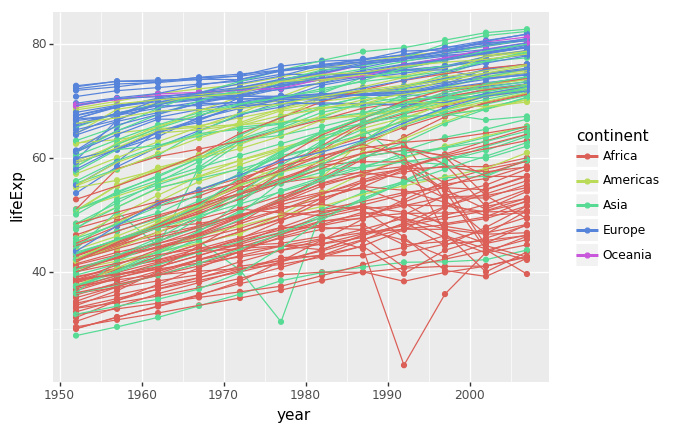

<ggplot: (7552107633)>

In [24]:
ggplot(gapminder, aes(x='year', y='lifeExp', color='continent')) +\
geom_point() +\
geom_line(aes(group='country'))

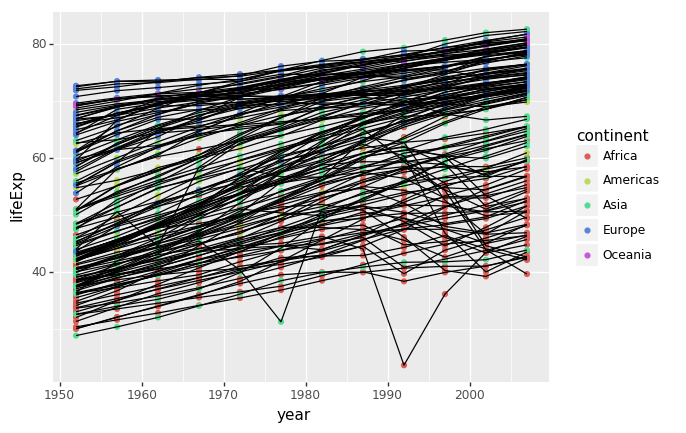

<ggplot: (7551699208)>

In [25]:
ggplot(gapminder, aes(x='year', y='lifeExp')) +\
geom_point(aes(color='continent')) +\
geom_line(aes(group='country'))

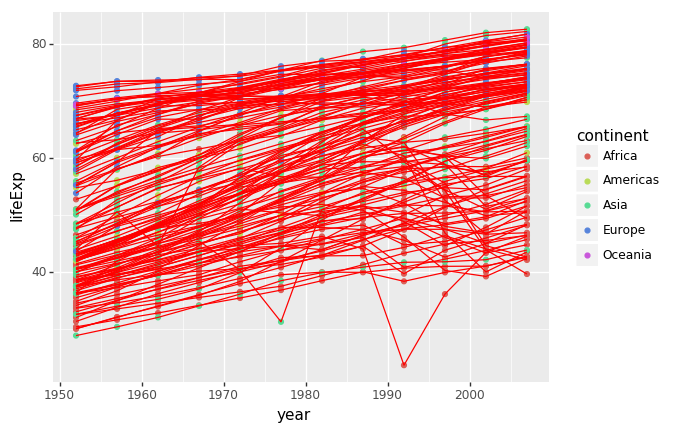

<ggplot: (-9223372029303099199)>

In [27]:
ggplot(gapminder, aes(x='year', y='lifeExp')) +\
geom_point(aes(color='continent')) +\
geom_line(aes(group='country'), color="red")

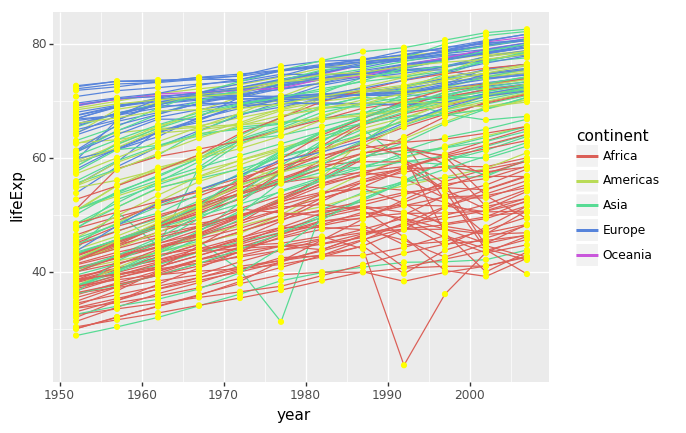

<ggplot: (7551246277)>

In [41]:
ggplot(gapminder, aes(x='year', y='lifeExp')) +\
geom_line(aes(group='country', color='continent')) +\
geom_point(color='yellow')

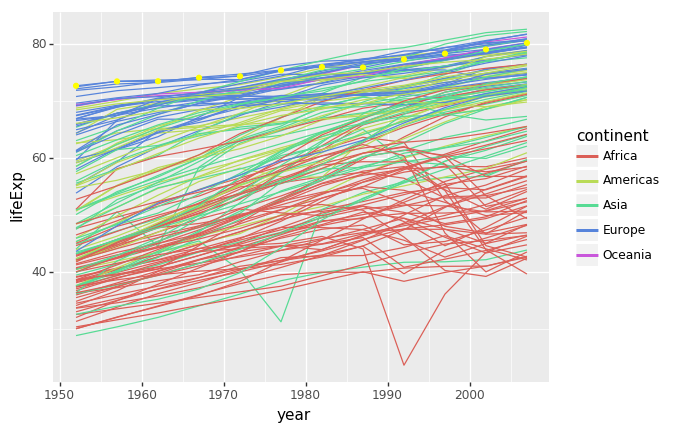

<ggplot: (-9223372029301718496)>

In [44]:
ggplot(gapminder, aes(x='year', y='lifeExp')) +\
geom_line(aes(group='country', color='continent')) +\
geom_point(gapminder[gapminder.country=='Norway'],color='yellow')

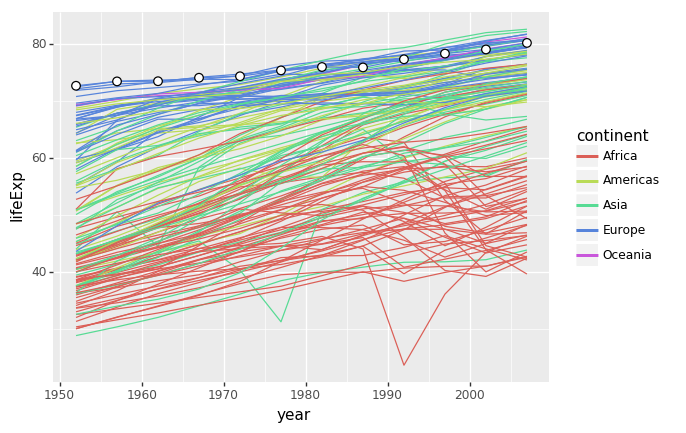

<ggplot: (-9223372029301243290)>

In [50]:
ggplot(gapminder, aes(x='year', y='lifeExp')) +\
geom_line(aes(group='country', color='continent')) +\
geom_point(gapminder[gapminder.country=='Norway'],
           color='black', fill='white', size=3)

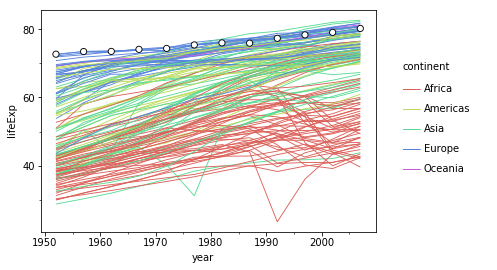

<ggplot: (-9223372029301716143)>

In [56]:
ggplot(gapminder, aes(x='year', y='lifeExp')) +\
geom_line(aes(group='country', color='continent')) +\
geom_point(gapminder[gapminder.country=='Norway'],
           color='black', fill='white', size=3) +\
theme(theme_bw)

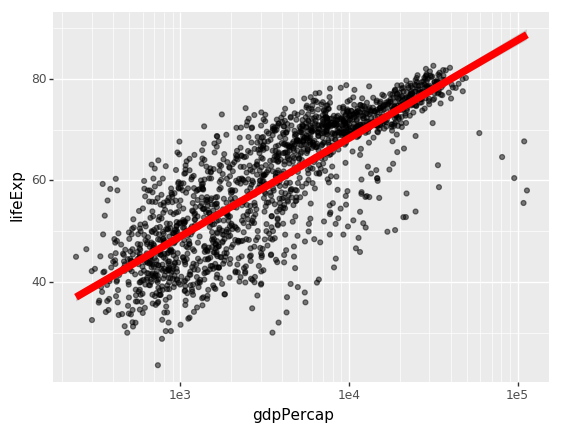

<ggplot: (-9223372029303273016)>

In [62]:
ggplot(gapminder, aes(x='gdpPercap', y='lifeExp')) + geom_point(alpha=0.5) +\
scale_x_log10() +\
geom_smooth(method='lm', size=3, color='red')

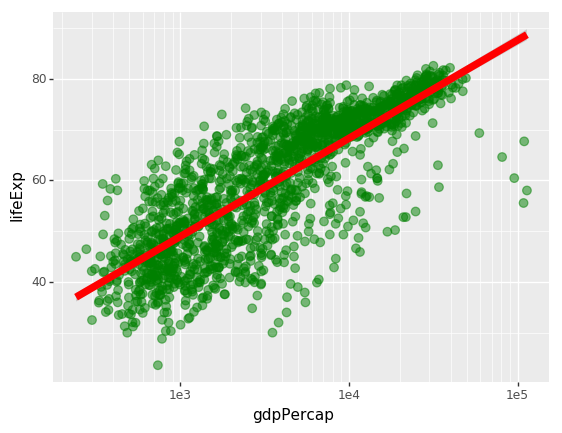

<ggplot: (7552314074)>

In [77]:
ggplot(gapminder, aes(x='gdpPercap', y='lifeExp')) + geom_point(color='green', size=3,alpha=0.5) +\
scale_x_log10() +\
geom_smooth(method='lm', size=3, color='red')

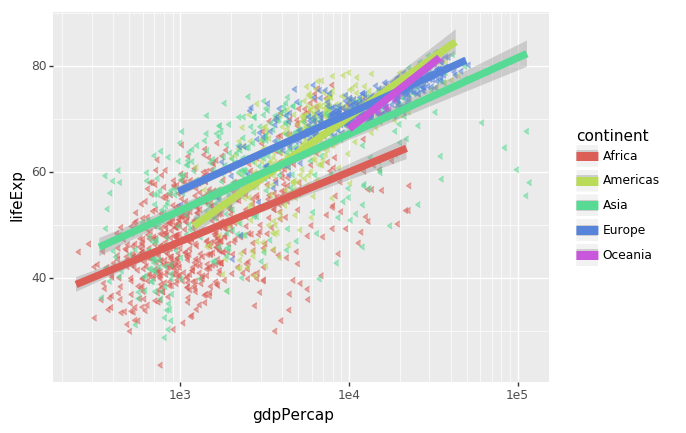

<ggplot: (-9223372029302223416)>

In [87]:
ggplot(gapminder, aes(x='gdpPercap', y='lifeExp', color='continent')) + geom_point(alpha = 0.5, size=2, shape=4) +\
scale_x_log10() +\
geom_smooth(method='lm', size=3)

In [92]:
countries=gapminder.loc[gapminder.country.str.startswith('A') | gapminder.country.str.startswith('Z')]
countries.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Zambia', 'Zimbabwe'], dtype=object)

In [123]:
countries=gapminder.loc[gapminder.country.str.startswith('A') | gapminder.country.str.startswith('Z')]
p = ggplot(countries, aes(x='year', y='lifeExp', color='continent')) +\
geom_line() +\
facet_wrap('~country') +\
labs(x='Year', y='Life Expectancy', title='Figure 1', color='continent') +\
theme(axis_text_x=element_text(size=8, rotation=45)) +\
p.save("facets.png", width=10, height=10, dpi=300)

/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 10 x 10 in image.
  from_inches(height, units), units))
/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: facets.png
  warn('Filename: {}'.format(filename))


AttributeError: 'NoneType' object has no attribute '__radd__'

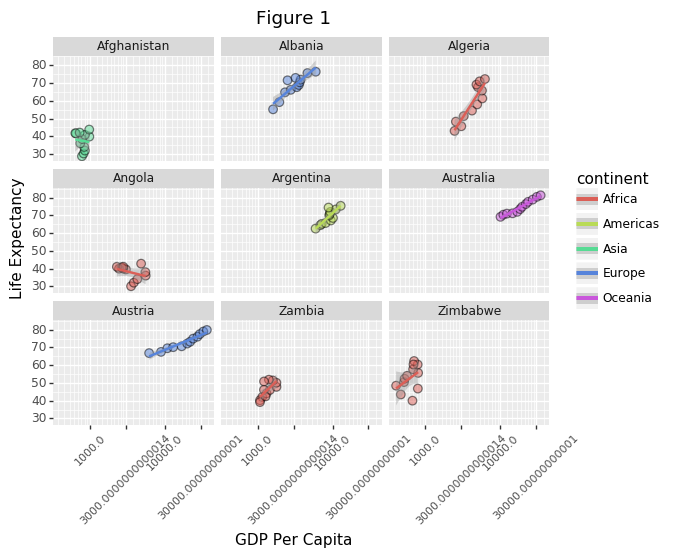

<ggplot: (-9223372029302441605)>

In [149]:
countries=gapminder.loc[gapminder.country.str.startswith('A') | gapminder.country.str.startswith('Z')]
countries.country.unique()
ggplot(countries, aes(x='gdpPercap', y='lifeExp', color='continent')) +\
geom_point(aes(fill='continent'),alpha=0.5,color='black', size=3, show_legend=False) + scale_x_log10()  + geom_smooth(method='lm') +\
facet_wrap('~country') +\
labs(x='GDP Per Capita', y='Life Expectancy', title='Figure 1', color='continent') +\
theme(axis_text_x=element_text(size=8, rotation=45))

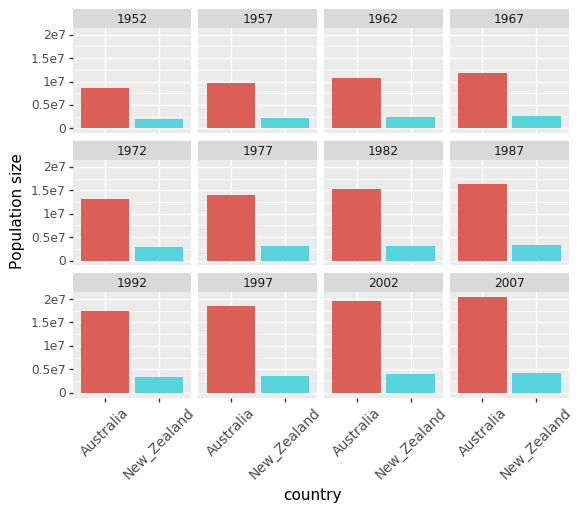

<ggplot: (7553694293)>

In [154]:
ggplot(gapminder.loc[(gapminder.continent=='Oceania')], aes(x = 'country', y = 'pop')) +\
geom_bar(aes(fill='country'), stat=stat_identity, show_legend=False) + \
labs(y='Population size') +\
facet_wrap('~year') +\
theme(axis_text_x=element_text(size=10,rotation=45))

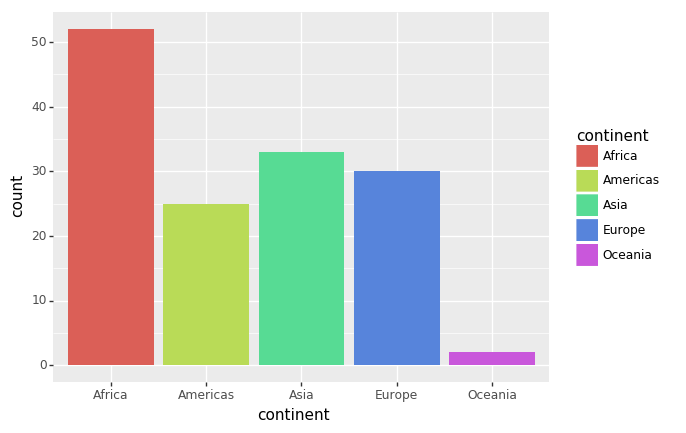

<ggplot: (-9223372029301217543)>

In [155]:
ggplot(gapminder[gapminder.year==1957], aes(x='continent')) + geom_bar(aes(fill='continent'))